In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style='text-align: center; text-decoration: underline; color: purple'>Analytics</p>

In [2]:
df = pd.read_csv('df_fit.csv')
df.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,54509482,1280.0,133.0,petrol,0.999,5.9
1,76299391,1403.0,144.0,petrol,1.498,4.6
2,84743902,1165.0,92.0,petrol,1.490,4.1
3,83154489,1695.0,155.0,petrol,1.998,6.8
4,53246766,1347.0,144.0,petrol,1.498,5.1


In [3]:
print(df.shape)
df.describe()

(1000000, 6)


,ID,Mass_(kg),CO2_emission_(g/km),Engine_size,Fuel_consumption_(l/100km)
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,6.376881e+07,1419.008491,137.162264,1.530418,5.722221
std,2.088359e+07,281.397317,28.715074,0.511396,1.233159
min,6.000000e+00,570.000000,52.000000,0.658000,1.000000
25%,5.179585e+07,1210.000000,120.000000,1.197000,5.000000
50%,7.384128e+07,1395.000000,131.000000,1.498000,5.500000
75%,8.044056e+07,1570.000000,146.000000,1.968000,6.200000
max,1.496951e+08,3950.000000,572.000000,7.993000,25.200000


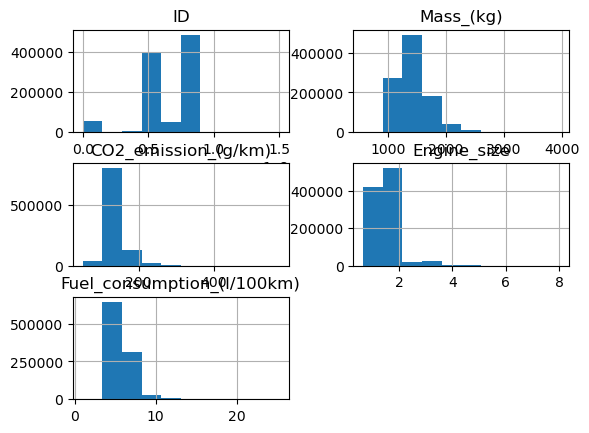

In [4]:
df.hist()
plt.show()

In [5]:
df1 = df[(df['Mass_(kg)'] >= 900) & (df['Mass_(kg)'] <= 3000)]
df1.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,54509482,1280.0,133.0,petrol,0.999,5.9
1,76299391,1403.0,144.0,petrol,1.498,4.6
2,84743902,1165.0,92.0,petrol,1.490,4.1
3,83154489,1695.0,155.0,petrol,1.998,6.8
4,53246766,1347.0,144.0,petrol,1.498,5.1


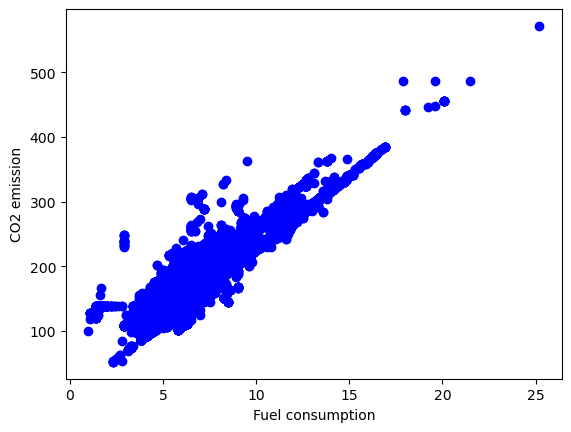

In [6]:
plt.scatter(df['Fuel_consumption_(l/100km)'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 emission')
plt.show()

In [7]:
df.sort_values('CO2_emission_(g/km)') #Corroborando, el auto que menos co2 emite es un porche hibrido. Lo subieron como petrol. Esta mal.

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
150382,237862,2295.0,52.0,petrol,2.894,2.3
526485,196032,2295.0,52.0,petrol,2.894,2.3
662185,478018,2295.0,52.0,petrol,2.894,2.3
229603,106304,2295.0,53.0,petrol,2.894,2.3
678503,613051,2295.0,53.0,petrol,2.894,2.3
...,...,...,...,...,...,...
62906,80884753,2866.0,456.0,petrol,3.982,20.1
760416,55576365,1765.0,486.0,petrol,6.498,17.9
229074,56750184,1765.0,486.0,petrol,6.498,19.6
680982,51966583,2070.0,487.0,petrol,7.993,21.5


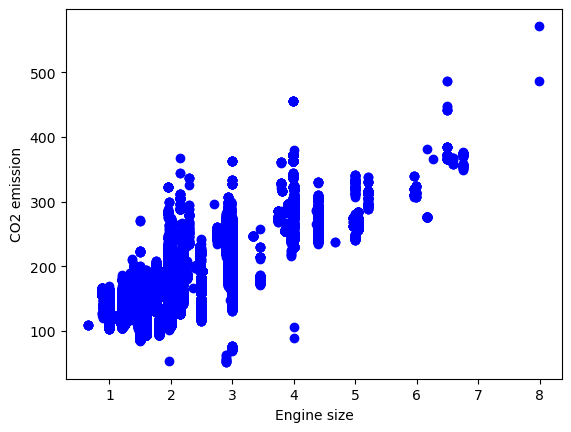

In [8]:
plt.scatter(df['Engine_size'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

---

## Modelo de regresion lineal

### Entrenamiento

In [9]:
msk = np.random.rand(len(df)) < 0.8 #msk = mask. Lista de len(df) numeros aleatorios entre el 0 y 1. aproximadamente el 80% del conjunto (<0.8)
train = df[msk]
test = df[~msk]

In [10]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emission_(g/km)']])
regr.fit(train_x, train_y)

#Coeficientes
print('Pendiente:', regr.coef_)
print('Interseccion', regr.intercept_)

Pendiente: [[36.36074793]]
Interseccion [81.52595187]


##### Graficamos el resultado

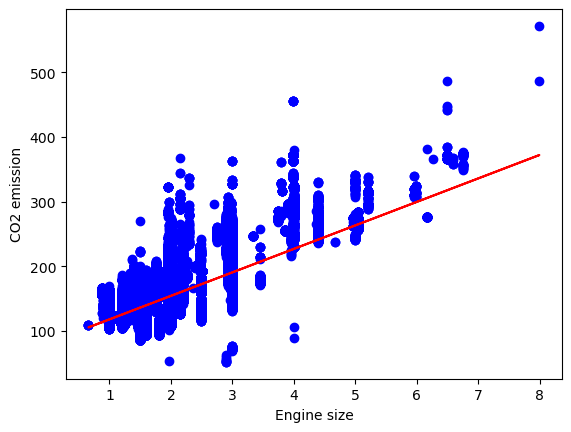

In [11]:
plt.scatter(train['Engine_size'], train['CO2_emission_(g/km)'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

### Testeo

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emission_(g/km)']])
test_y_ = regr.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual de la suma de los cuadrados (MSE): %0.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %0.2f' % r2_score(test_y, test_y_))

Error medio absoluto: 15.98
Residual de la suma de los cuadrados (MSE): 478.89
R2-score: 0.41
